<a href="https://colab.research.google.com/github/KishorAlagappan/Pandas-CaseStudy/blob/main/Pandas_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [3]:
df1=pd.read_csv("college_1.csv")
df2=pd.read_csv("college_2.csv")

In [4]:
df1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [5]:
df2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [6]:
data = pd.concat(map(pd.read_csv, ['college_1.csv', 'college_2.csv']), ignore_index=True)
print(data)

              Name  python  mysql  Previous Geekions  CodeKata Score  \
0        A.Dharani    82.0   20.0              24500           24500   
1      V.JEEVITHA     82.0   20.0              21740           21740   
2      HEMAVATHI.R   100.0  100.0              19680           19680   
3      Mugunthan S   100.0   47.0              10610           10610   
4      Sathammai.S   100.0    8.0               8980            8980   
..             ...     ...    ...                ...             ...   
114  praveen raj j    24.0    0.0               2380            2380   
115     AMARNATH D    -1.0   12.0               1890            1890   
116           bala    32.0    0.0               1720            1720   
117           XY Z    -1.0   -1.0                  0               0   
118      Hariharan    -1.0   -1.0                  0               0   

                                    Department  Rising  python_en  \
0             Computer Science and Engineering       0        NaN 

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


In [7]:
data.to_csv("college_data.csv")

###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [9]:
Score=data[data["CodeKata Score"]>15000]
Score.to_csv("Exceeded expectations.csv")

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [10]:
Reached_Score=data[(data["CodeKata Score"]>10000) & (data["CodeKata Score"]<15000)]
Reached_Score.to_csv("Reached_expectations")

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [12]:
improvement=data[(data["CodeKata Score"]>7000) & (data["CodeKata Score"]<10000)]
improvement.to_csv("Needs_Improvement")

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [14]:
unsatisfactory=data[data["CodeKata Score"]>15000]
unsatisfactory.to_csv("Unsatisfactory")

Text(0.5, 1.0, 'Average of previous week geekions vs this week geekions')

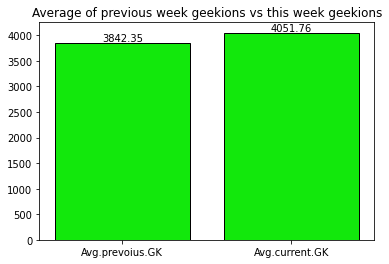

In [15]:
x=data["Previous Geekions"].mean()
y=data["CodeKata Score"].mean()
x1="{:.2f}".format(x)
y1="{:.2f}".format(y)
a=[x,y]
value=[x1,y1]
b=["Previous Geekions","CodeKata Score"]
lab=["Avg.prevoius.GK","Avg.current.GK"]
plt.bar(b,a,fc="#12e80c",ec="k")
for i in range(len(a)):
  plt.text(i,a[i],value[i],ha="center",va="bottom")
plt.xticks(b,lab)
plt.title("Average of previous week geekions vs this week geekions")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [16]:
active=data[data["Rising"]!=0]
print("NO OF STUDENTS PARTICIPATED CODEKATA IN THIS WEEK:",len(active))


NO OF STUDENTS PARTICIPATED CODEKATA IN THIS WEEK: 22
NO OF STUDENTS PARTICIPATED IN PROGRAM: 119


###### No of students participated 

In [19]:
print("NO OF STUDENTS PARTICIPATED IN PROGRAM:",len(data))

NO OF STUDENTS PARTICIPATED IN PROGRAM: 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [18]:
python_avg=data["python"].mean()
mysql_avg=data["mysql"].mean()
df2=pd.read_csv("college_2.csv")
python_en_avg=data["python_en"].mean()
com_think_avg=data["computational_thinking"].mean()
print("THE AVERAGE COMPETION OF MYSQL IS :","{:.1f}".format(mysql_avg))
print("THE AVERAGE COMPETION OF PYTHON IS :","{:.1f}".format(python_avg))
print("THE AVERAGE COMPETION OF PYTHON_EN IS :","{:.1f}".format(python_en_avg))
print("THE AVERAGE COMPETION OF COMPUTATIONAL_THINKING IS :","{:.1f}".format(com_think_avg))

THE AVERAGE COMPETION OF MYSQL IS : 23.5
THE AVERAGE COMPETION OF PYTHON IS : 54.4
THE AVERAGE COMPETION OF PYTHON_EN IS : 29.7
THE AVERAGE COMPETION OF COMPUTATIONAL_THINKING IS : 2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [20]:
rising=data.sort_values("Rising",ascending=False,ignore_index=True)
rising.index+=1
print(rising["Name"].head(3))

1             shifak N
2       Narasimhan Y L
3    Ganesh Ramkumar R
Name: Name, dtype: object


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [21]:
shining=data.sort_values("CodeKata Score",ascending=False)
shining.index+=1
print(shining["Name"].head(3))

1      A.Dharani
2    V.JEEVITHA 
3    HEMAVATHI.R
Name: Name, dtype: object


###### Department wise codekata performence (pie chart)

In [22]:
import plotly.express as px
fig=px.pie(data,names=["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering "],values=(data.groupby("Department")["CodeKata Score"]).mean(),title="DEPARTMENT WISE CODEKATA PERFORMANCE")
fig.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [23]:
def CSian(row):
  if row["Department"]=="Computer Science and Engineering":
    return row["CodeKata Score"]
data["CSian"]=data.apply(CSian,axis=1)

def EEEian(row):
  if row["Department"]=="Electronics and Electrical Engineering":
    return row["CodeKata Score"]
data["EEEian"]=data.apply(EEEian,axis=1)

def ECEian(row):
  if row["Department"]=="Electronics and Communication Engineering":
    return row["CodeKata Score"]
data["ECEian"]=data.apply(ECEian,axis=1)

In [24]:
cse_topper=data.sort_values("CSian",ascending=False,ignore_index=True).head(3)
cse_topper.index +=1
print(cse_topper["Name"])

1      A.Dharani
2    V.JEEVITHA 
3    HEMAVATHI.R
Name: Name, dtype: object


In [25]:
eee_topper=data.sort_values("EEEian",ascending=False,ignore_index=True).head(3)
eee_topper.index +=1
print(eee_topper["Name"])

1    ASHOK KUMAR K
2        VIINU V P
3         shifak N
Name: Name, dtype: object


In [26]:
ece_topper=data.sort_values("ECEian",ascending=False,ignore_index=True).head(3)
ece_topper.index +=1
print(ece_topper["Name"])

1    Bodipudi Harini
2          Gowtham R
3      KALAIARASAN K
Name: Name, dtype: object


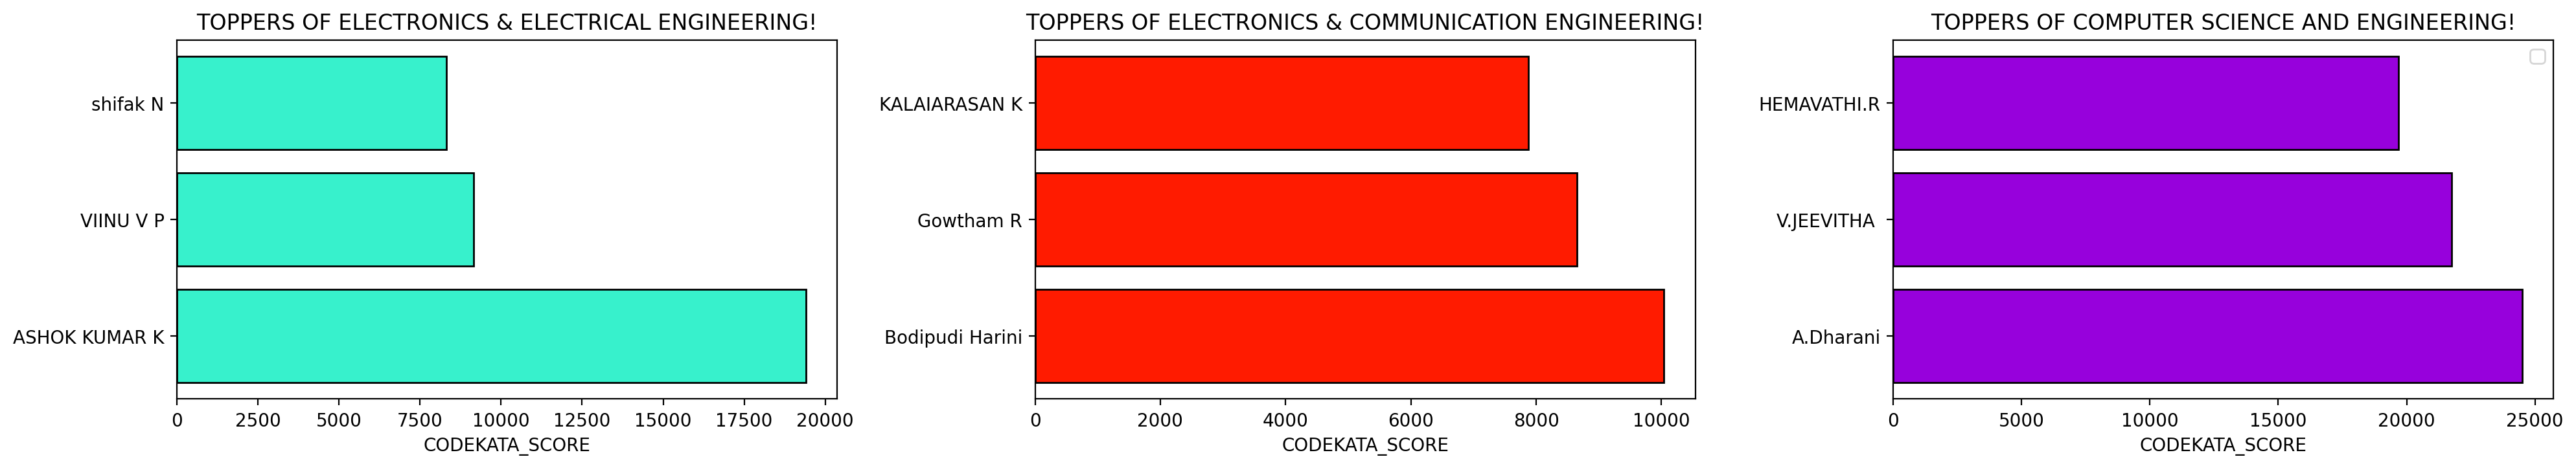

In [28]:
plt.figure(figsize=(20,10),dpi=200)
plt.subplot(3,3,1)
plt.barh(eee_topper["Name"],eee_topper["CodeKata Score"],fc="#37f1cc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & ELECTRICAL ENGINEERING!")
plt.xlabel("CODEKATA_SCORE")

plt.subplot(3,3,2)
plt.barh(ece_topper["Name"],ece_topper["CodeKata Score"],fc="#ff1b00",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & COMMUNICATION ENGINEERING!")

plt.subplot(3,3,3)
plt.barh(cse_topper["Name"],cse_topper["CodeKata Score"],fc="#9701dc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF COMPUTER SCIENCE AND ENGINEERING!")
plt.tight_layout()
plt.legend()
plt.show()

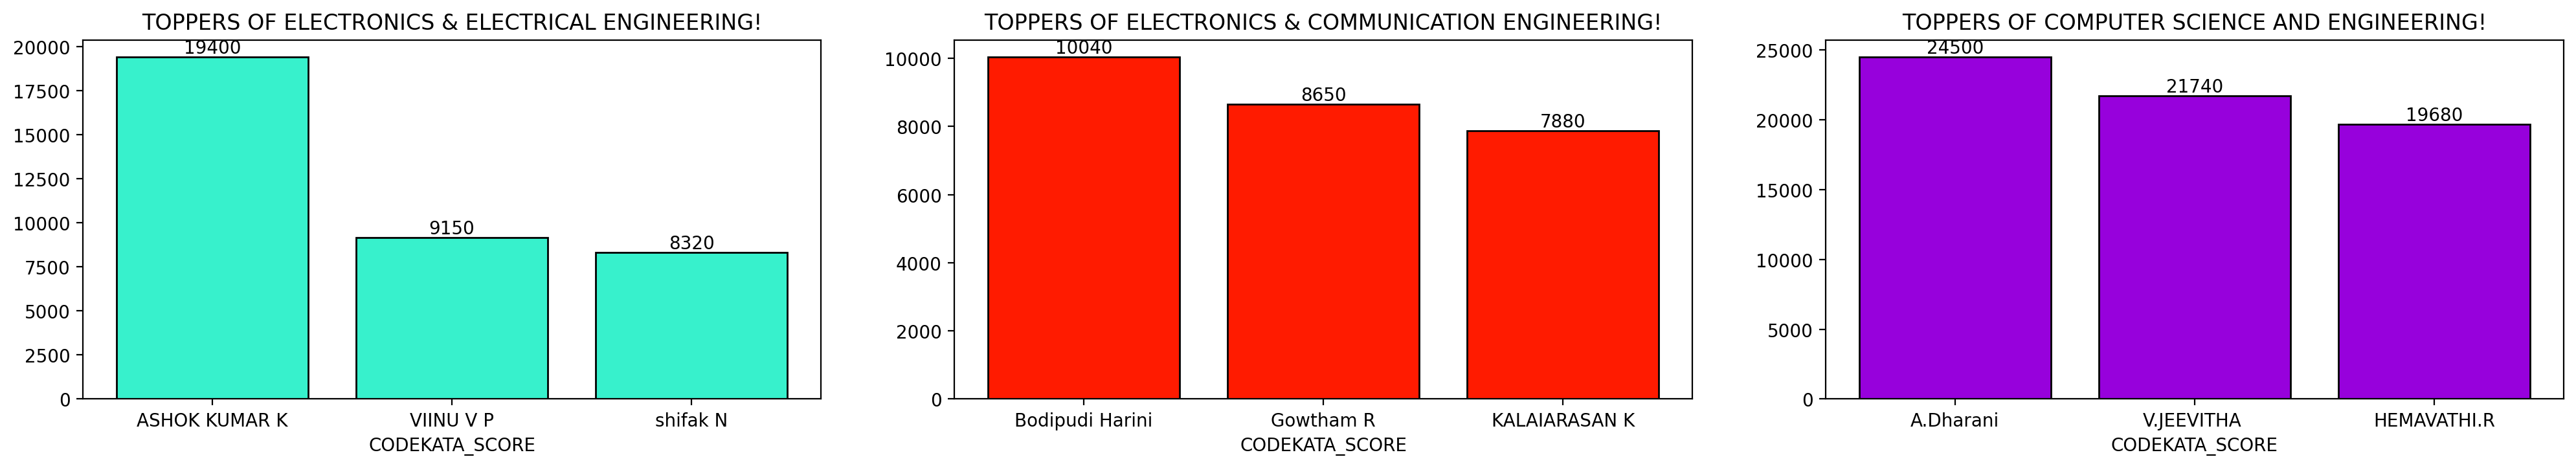

In [29]:
plt.figure(figsize=(20,10),dpi=200)
plt.subplot(3,3,1)
plt.bar(eee_topper["Name"],eee_topper["CodeKata Score"],fc="#37f1cc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & ELECTRICAL ENGINEERING!")
plt.xlabel("CODEKATA_SCORE")
for i in range(1,len(eee_topper)+1):
  plt.text(i-1,eee_topper["CodeKata Score"][i],eee_topper["CodeKata Score"][i],ha="center",va="bottom")

plt.subplot(3,3,2)
plt.bar(ece_topper["Name"],ece_topper["CodeKata Score"],fc="#ff1b00",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF ELECTRONICS & COMMUNICATION ENGINEERING!")
for i in range(1,len(ece_topper)+1):
  plt.text(i-1,ece_topper["CodeKata Score"][i],ece_topper["CodeKata Score"][i],ha="center",va="bottom")

plt.subplot(3,3,3)
plt.bar(cse_topper["Name"],cse_topper["CodeKata Score"],fc="#9701dc",ec="k")
plt.xlabel("CODEKATA_SCORE")
plt.title("TOPPERS OF COMPUTER SCIENCE AND ENGINEERING!")
for i in range(1,len(cse_topper)+1):
  plt.text(i-1,cse_topper["CodeKata Score"][i],cse_topper["CodeKata Score"][i],ha="center",va="bottom")
plt.tight_layout()
plt.show()